In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importaciones**

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 

In [3]:
print(os.listdir('/content/drive/My Drive/Relojes'))

['horas_minutos.npy', 'imagen_reloj.npy', 'Clock_Image_Reading.ipynb']


# **Carga de la base de datos**

In [4]:
x = np.load('/content/drive/My Drive/Relojes/imagen_reloj.npy')
y = np.load('/content/drive/My Drive/Relojes/horas_minutos.npy')

# **Dimensiones de la base de datos**

In [5]:
x.shape, y.shape

((2000, 64, 64), (2000, 2))

# **Despliegue de algunas imágenes**

label 8.0:5.0


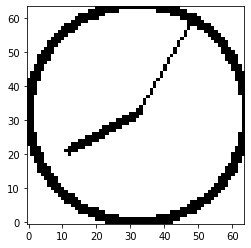

label 11.0:33.0


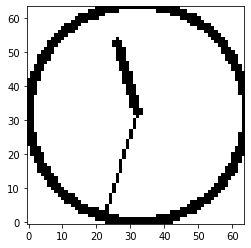

label 3.0:36.0


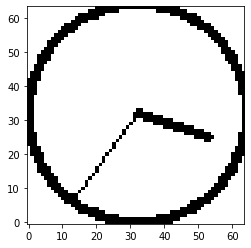

label 9.0:32.0


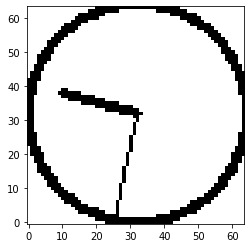

label 2.0:3.0


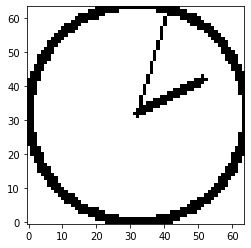

label 0.0:56.0


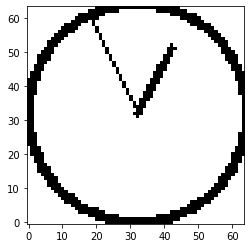

label 2.0:11.0


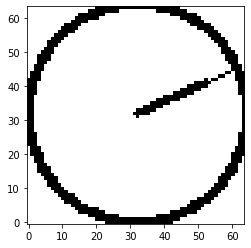

label 3.0:53.0


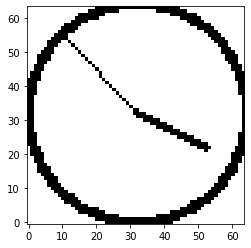

label 3.0:32.0


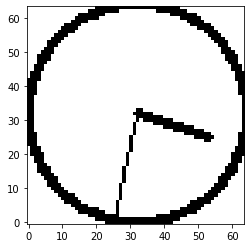

label 10.0:52.0


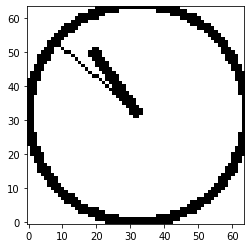

label 6.0:8.0


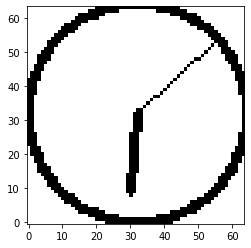

label 0.0:16.0


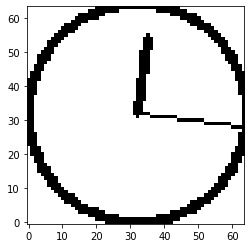

label 0.0:35.0


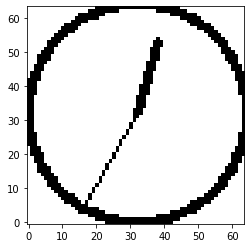

label 10.0:44.0


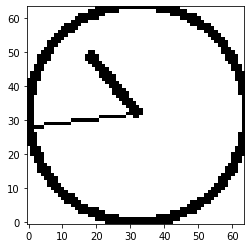

label 11.0:33.0


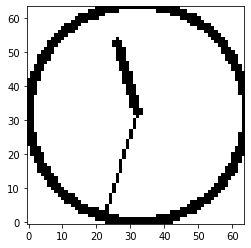

In [6]:
for i in range(15):
    print ("label", "{}:{}".format(y[i][0], y[i][1]))
    img = x[i]
    plt.imshow(img, cmap='Greys', origin="lower")
    plt.show()

# **Redimensionamos el batch de instancias**

In [ ]:
x = np.expand_dims(x, axis=-1)

In [ ]:
x.shape

(2000, 64, 64, 1)

# **Partición de la base de datos en conjunto de entrenamiento y validación**

In [ ]:
train_data = x[:1000]
train_labels = y[:1000]
test_data = x[1000:]
test_labels = y[1000:]

# **Definición de la arquitectura**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu',
                        input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2))

# **Compilación**

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='mse',
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=['mse']) # acc -> accuracy

# **Entrenamiento**

In [ ]:
history = model.fit(train_data, train_labels, batch_size=40, epochs=60, validation_data=(test_data,test_labels))

Epoch 1/60
25/25 [==============================] - 0s 11ms/step - loss: 188.5470 - mse: 188.5470 - val_loss: 114.4706 - val_mse: 114.4706
Epoch 2/60
25/25 [==============================] - 0s 6ms/step - loss: 83.4724 - mse: 83.4724 - val_loss: 64.6919 - val_mse: 64.6919
Epoch 3/60
25/25 [==============================] - 0s 6ms/step - loss: 40.3157 - mse: 40.3157 - val_loss: 28.6923 - val_mse: 28.6923
Epoch 4/60
25/25 [==============================] - 0s 6ms/step - loss: 18.2221 - mse: 18.2221 - val_loss: 18.4979 - val_mse: 18.4979
Epoch 5/60
25/25 [==============================] - 0s 6ms/step - loss: 11.9377 - mse: 11.9377 - val_loss: 10.3473 - val_mse: 10.3473
Epoch 6/60
25/25 [==============================] - 0s 6ms/step - loss: 7.7912 - mse: 7.7912 - val_loss: 9.8439 - val_mse: 9.8439
Epoch 7/60
25/25 [==============================] - 0s 7ms/step - loss: 6.0505 - mse: 6.0505 - val_loss: 7.5913 - val_mse: 7.5913
Epoch 8/60
25/25 [==============================] - 0s 6ms/step -

# **Comparación entre predicciones (valores obtenidos) y las etiquetas (valores esperados)**

In [ ]:
predictions = model.predict(test_data)

print("Ground truth labels", "          ", "Predictions")
for i in range(1000):
  print(test_labels[i, [0,1]], "   ", predictions[i,[0,1]])


Ground truth labels            Predictions
[ 3. 55.]     [ 3.2887647 54.24167  ]
[ 8. 50.]     [ 8.460048 48.48277 ]
[ 2. 24.]     [ 1.9557071 24.568893 ]
[ 6. 48.]     [ 6.0737567 47.976463 ]
[ 5. 11.]     [ 5.0529537 11.049948 ]
[ 2. 55.]     [ 2.1132429 54.454502 ]
[0. 8.]     [0.04474743 8.221568  ]
[ 5. 21.]     [ 5.044931 20.714157]
[4. 5.]     [3.9943032 4.913941 ]
[ 2. 45.]     [ 2.123089 44.820942]
[10. 50.]     [10.668546 51.0663  ]
[ 6. 44.]     [ 5.9896665 44.039307 ]
[ 5. 12.]     [ 4.962389 12.153113]
[ 2. 59.]     [ 1.9889029 59.180756 ]
[11. 52.]     [11.108926 51.61301 ]
[10. 34.]     [ 9.989424 33.899193]
[ 3. 42.]     [ 3.0556645 41.715405 ]
[ 0. 50.]     [ 0.28401127 50.15482   ]
[ 0. 59.]     [-1.4073228e-02  5.8791702e+01]
[ 3. 26.]     [ 3.071598 26.9217  ]
[ 3. 45.]     [ 3.0310316 44.853317 ]
[ 0. 31.]     [-0.11392174 30.89821   ]
[ 0. 57.]     [-0.19128618 56.409363  ]
[ 1. 58.]     [ 1.0387768 57.51951  ]
[ 8. 59.]     [ 7.9294524 59.16606  ]
[ 6. 32.]     [

# **Método para obtener la precisión**

In [ ]:
def get_accuracy(validation_data, validation_labels):
    predictions = np.round(model.predict(validation_data))
    error = predictions - validation_labels
    a = np.min(np.abs(error), axis=1)
    return np.count_nonzero(a==0)/a.shape[0]

# **Precisión en el conjunto de entrenamiento**

In [ ]:
print(get_accuracy(train_data, train_labels))

1.0


# **Precisión en el conjunto de validación**

In [ ]:
print(get_accuracy(test_data, test_labels))

[[ 0. -1.]
 [ 0. -2.]
 [ 0.  1.]
 ...
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 